In [1]:
# Importing Libraries
import pandas as pd
import seaborn as sns 
import matplotlib as plt
import numpy as np

In [2]:
df= pd.read_csv(r"C:\Users\PMYLS\Downloads\archive (5)\movies.csv")

In [3]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [57]:
# Starting Data Cleaning Process
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 5407 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5407 non-null   object 
 1   rating    5407 non-null   object 
 2   genre     5407 non-null   object 
 3   released  5407 non-null   object 
 4   score     5407 non-null   float64
 5   votes     5407 non-null   float64
 6   director  5407 non-null   object 
 7   writer    5407 non-null   object 
 8   star      5407 non-null   object 
 9   country   5407 non-null   object 
 10  budget    5407 non-null   float64
 11  gross     5407 non-null   float64
 12  company   5407 non-null   object 
 13  runtime   5407 non-null   float64
 14  year      5407 non-null   int32  
dtypes: float64(5), int32(1), object(9)
memory usage: 654.8+ KB


In [5]:
# Splitting released column to extract exact date because year column data is ambigious
df=df.drop('year',axis=1)


In [6]:
df['released']=df['released'].apply(lambda x: str(x))

In [7]:
df[['month','year']]=df['released'].str.split(',',n=1,expand=True)

In [8]:
df

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month,year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June 13,1980 (United States)
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July 2,1980 (United States)
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,June 20,1980 (United States)
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July 2,1980 (United States)
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July 25,1980 (United States)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,October 23,2020 (United States)
7664,Dream Round,NaN,Comedy,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,February 7,2020 (United States)
7665,Saving Mbango,NaN,Drama,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,April 27,2020 (Cameroon)
7666,It's Just Us,NaN,Drama,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,October 1,2020 (United States)


In [9]:
df=df.drop('month',axis =1)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5407 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5407 non-null   object 
 1   rating    5407 non-null   object 
 2   genre     5407 non-null   object 
 3   released  5407 non-null   object 
 4   score     5407 non-null   float64
 5   votes     5407 non-null   float64
 6   director  5407 non-null   object 
 7   writer    5407 non-null   object 
 8   star      5407 non-null   object 
 9   country   5407 non-null   object 
 10  budget    5407 non-null   float64
 11  gross     5407 non-null   float64
 12  company   5407 non-null   object 
 13  runtime   5407 non-null   float64
 14  year      5407 non-null   int32  
dtypes: float64(5), int32(1), object(9)
memory usage: 654.8+ KB


In [11]:
df.replace('', np.nan,inplace=True)

In [12]:
df['year'] = df['year'].replace([None], np.nan)

In [13]:
df=df.dropna()

In [14]:
df['year']=df['year'].apply(lambda x: x[:5])

In [15]:
df['year']=df['year'].astype('int')



In [16]:
df

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,2020


In [17]:
df=df.drop_duplicates()

In [18]:
df

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,2020


In [19]:
# df['column_name'] = pd.to_numeric(df['column_name'], errors='coerce')


# Convert to numeric and replace invalid values with NaN
# df['year'] = pd.to_numeric(df['year'], errors='coerce')


In [20]:
# Looking at Correlation specifically for budget and gross
df_numeric= df.select_dtypes(include=[np.number])

In [21]:
df_numeric.corr()

,score,votes,budget,gross,runtime,year
score,1.000000,0.474594,0.071552,0.222504,0.414501,0.061443
votes,0.474594,1.000000,0.439077,0.614432,0.352263,0.202215
budget,0.071552,0.439077,1.000000,0.740028,0.318353,0.319669
gross,0.222504,0.614432,0.740028,1.000000,0.275641,0.268141
runtime,0.414501,0.352263,0.318353,0.275641,1.000000,0.075183
year,0.061443,0.202215,0.319669,0.268141,0.075183,1.000000


<Axes: xlabel='budget', ylabel='gross'>

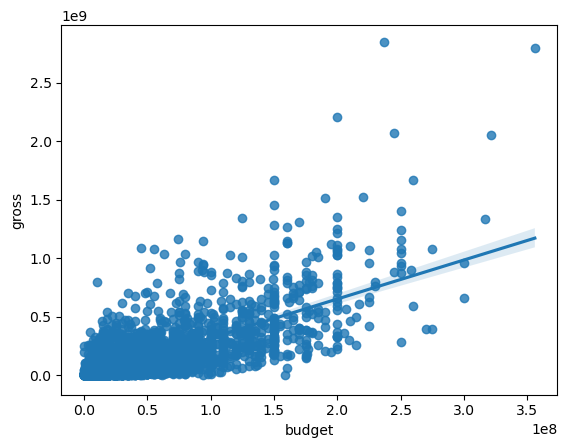

In [22]:
# Viewing Regplot
sns.regplot(x='budget',y='gross', data=df_numeric)

<Axes: xlabel='budget', ylabel='gross'>

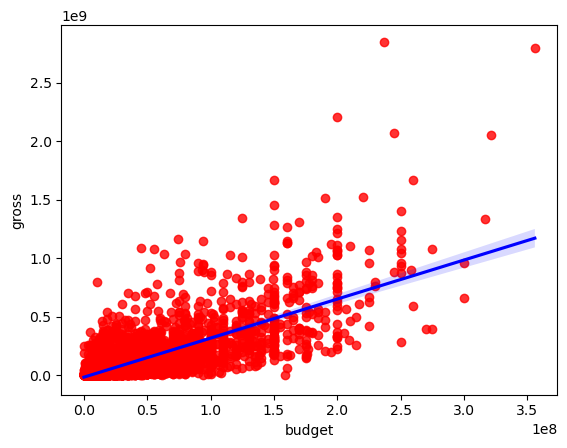

In [23]:
sns.regplot(x='budget',y='gross', data=df_numeric, scatter_kws= {'color':'red'}, line_kws={'color':'blue'})

In [24]:
corr_stack= df_numeric.corr()

In [25]:
corr_stack.unstack()

score    score      1.000000
         votes      0.474594
         budget     0.071552
         gross      0.222504
         runtime    0.414501
         year       0.061443
votes    score      0.474594
         votes      1.000000
         budget     0.439077
         gross      0.614432
         runtime    0.352263
         year       0.202215
budget   score      0.071552
         votes      0.439077
         budget     1.000000
         gross      0.740028
         runtime    0.318353
         year       0.319669
gross    score      0.222504
         votes      0.614432
         budget     0.740028
         gross      1.000000
         runtime    0.275641
         year       0.268141
runtime  score      0.414501
         votes      0.352263
         budget     0.318353
         gross      0.275641
         runtime    1.000000
         year       0.075183
year     score      0.061443
         votes      0.202215
         budget     0.319669
         gross      0.268141
         runti

In [26]:
# Now let's Sort this according to which pair have most highest correlation
sorted_pairs=corr_stack.unstack()
sorted_pairs.sort_values(ascending=False)

score    score      1.000000
votes    votes      1.000000
runtime  runtime    1.000000
gross    gross      1.000000
budget   budget     1.000000
year     year       1.000000
gross    budget     0.740028
budget   gross      0.740028
votes    gross      0.614432
gross    votes      0.614432
votes    score      0.474594
score    votes      0.474594
votes    budget     0.439077
budget   votes      0.439077
runtime  score      0.414501
score    runtime    0.414501
runtime  votes      0.352263
votes    runtime    0.352263
budget   year       0.319669
year     budget     0.319669
runtime  budget     0.318353
budget   runtime    0.318353
runtime  gross      0.275641
gross    runtime    0.275641
year     gross      0.268141
gross    year       0.268141
score    gross      0.222504
gross    score      0.222504
year     votes      0.202215
votes    year       0.202215
runtime  year       0.075183
year     runtime    0.075183
score    budget     0.071552
budget   score      0.071552
score    year 

In [27]:
# So this Shows Gross and Budget has highest Correlation and year and score have lowest